1. Найти и выгрузить многомерные данные с использованием
библиотеки pandas. В отчёте описать найденные данные. 

In [1]:
import pandas as pd
import numpy as np

# Датасет с информацией о выбросах углекислого газа в разных странах с 1990 по 2019 год
data = pd.read_csv('CO2_emission.csv', sep=",")
data = data.dropna()
print(data)

             Country Name country_code                      Region  \
1             Afghanistan          AFG                  South Asia   
2                  Angola          AGO          Sub-Saharan Africa   
3                 Albania          ALB       Europe & Central Asia   
4                 Andorra          AND       Europe & Central Asia   
5    United Arab Emirates          ARE  Middle East & North Africa   
..                    ...          ...                         ...   
210                 Samoa          WSM         East Asia & Pacific   
211           Yemen, Rep.          YEM  Middle East & North Africa   
212          South Africa          ZAF          Sub-Saharan Africa   
213                Zambia          ZMB          Sub-Saharan Africa   
214              Zimbabwe          ZWE          Sub-Saharan Africa   

                             Indicator Name       1990       1991       1992  \
1    CO2 emissions (metric tons per capita)   0.191745   0.167682   0.095958   

2. Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [2]:
import numpy as np

#data.info()
#print(data.head())

print(data.isna().sum())

# Удаление строк с пустыми значениями в столбцах
data = data.dropna()

print(data.isna().sum())

Country Name      0
country_code      0
Region            0
Indicator Name    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2019.1            0
dtype: int64
Country Name      0
country_code      0
Region            0
Indicator Name    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000   

3. Построить столбчатую диаграмму (.bar) с использованием библиотеки Plotly со следующими параметрами:

3.1 По оси Х указать дату или название, по оси У указать количественный показатель.

3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).

3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.

3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.

3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.

3.6. Размер текста меток осей сделать равным 14.

3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.

3.8. Убрать лишние отступы по краям.

In [3]:
import plotly.express as px
import plotly.graph_objs as go

data = pd.read_csv('CO2_emission.csv', sep=",")
data = data.dropna()

fig = go.Figure(px.bar(data.head(30), x='Country Name', y='1990', color = 'Country Name', text='1990'))
fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout(
    title={
        'text': "Выбросы CO2 в атмосферу за 1990-ый год",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=20,
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    width=None,
    height=700,
    margin=dict(l=0, r=0, t=35, b=0)
    )

fig.update_xaxes(
    tickangle = 315, 
    title_text = "Страны",
    title_font = {"size": 16}
    )
fig.update_yaxes(
    title_text = "Объём выбросов CO2",
    title_font = {"size": 16}
    )
fig.show()

4. Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2.


In [4]:
figPie = go.Figure(px.pie(data.head(10), values='1990', names='Country Name', color = 'Country Name'))
figPie.update_traces(marker=dict(line=dict(color='black', width=2)))
figPie.update_layout(
    title={
        'text': "Выбросы CO2 в атмосферу за 1990-ый год",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_tickfont_size = 14,
        yaxis_tickfont_size = 14,
        width=None,
        height=700,
        margin=dict(l=0, r=0, t=35, b=0))
figPie.show()

5. Построить линейный график накопленных значений количественного
показателя.

5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет точек 'white', цвет границ точек 'black', толщина границ точек равна 2.

5.2. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory').

In [5]:
figLine = go.Figure()
figLine.add_trace(go.Scatter(x=data['Country Name'].head(50), y=data['1990'], mode='lines+markers', line_color='crimson', marker_color='white'))
figLine.update_traces(marker=dict(line=dict(color='black', width=2)))
figLine.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
figLine.show()

6. Постараться создать аналогичные графики с использованием
библиотеки matplotlib.


<ipython-input-6-52d816208794>:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



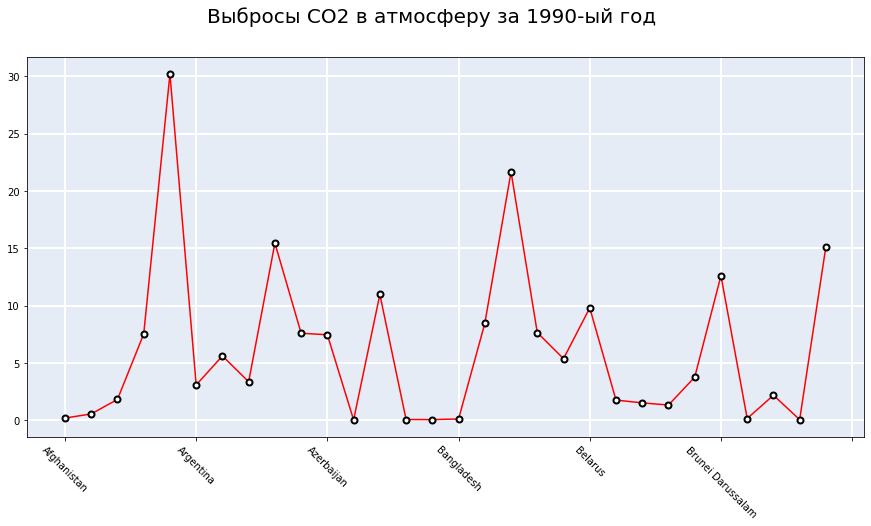

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.suptitle('Выбросы CO2 в атмосферу за 1990-ый год', fontsize=20)
plt.xticks(np.arange(start=0, stop=len(data), step=5), rotation = 315)
plt.plot(data['Country Name'].head(30), data['1990'].head(30), marker='o', mfc='white', color='red', mew='2', mec='black')
plt.grid(color='#FFFFFF', linestyle='-', linewidth=2)
ax = plt.axes()
ax.set_facecolor("#E5ECF6")


Text(0.5, 0.98, 'Выбросы CO2 в атмосферу за 1990-ый год')

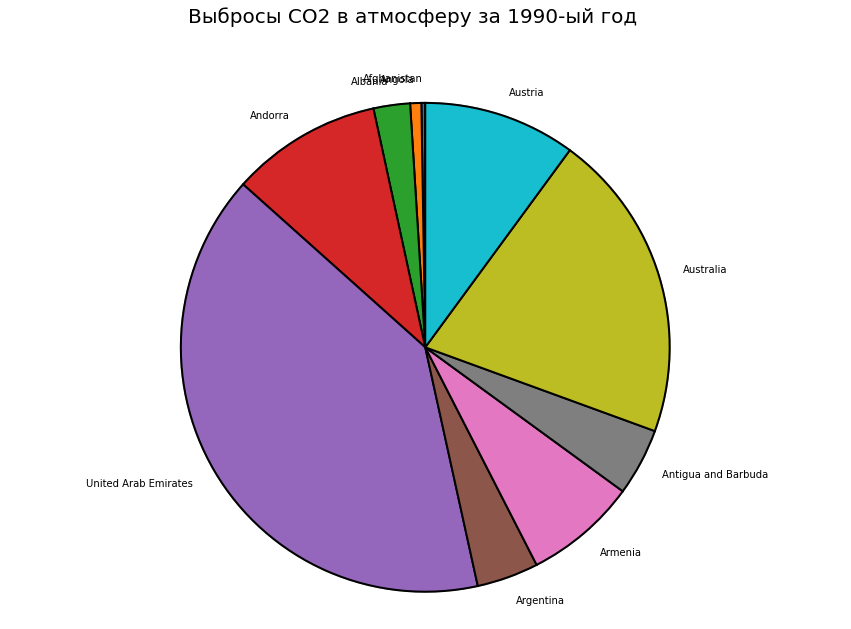

In [7]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(data['1990'].head(10), labels=data['Country Name'].head(10), shadow=True, startangle=90, radius=1800, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
ax1.axis('equal')
fig1.suptitle('Выбросы CO2 в атмосферу за 1990-ый год', fontsize=20)


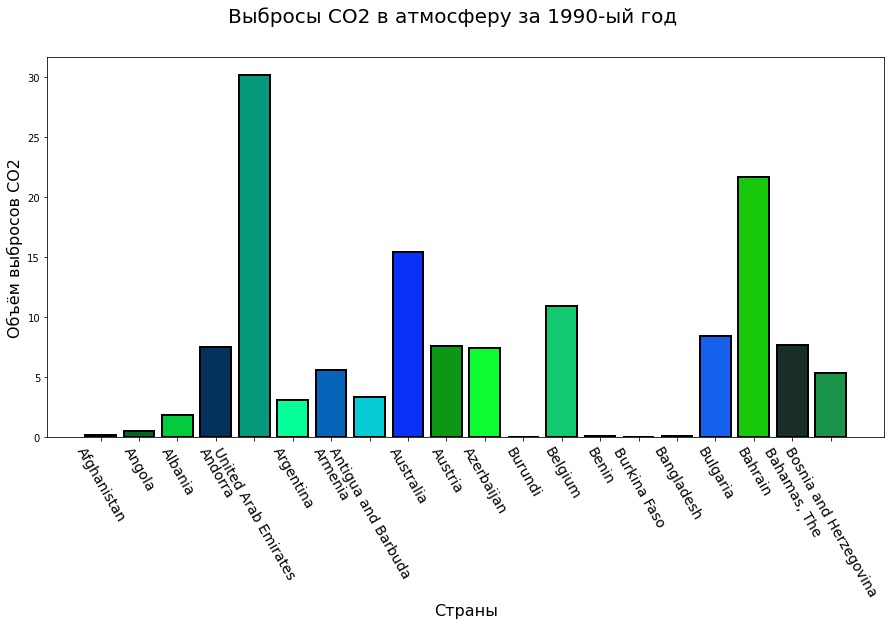

In [8]:
barColor=[]
for i in range(0, len(data)):
  stringBar='#'
  stringBar+='{:0>6}'.format(f'{int(16777214*(i/len(data))):x}')
  barColor.append(stringBar)
plt.figure(figsize=(15,7))
plt.bar(data['Country Name'].head(20), data['1990'].head(20), linewidth=2, edgecolor='black', color=barColor)
plt.xticks(np.arange(start=0, stop=len(data.head(20)), step=1), rotation = 300, fontsize=14)
plt.xlabel("Страны", fontsize=16)
plt.ylabel("Объём выбросов CO2", fontsize=16)
plt.suptitle('Выбросы CO2 в атмосферу за 1990-ый год', fontsize=20)

plt.show()
